<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

NOTE: All CSVs are in the same directory as this notebook

### 1.1 Make a pandas DataFrame object with pandas `.read_csv()` function

Take a look at the `.dtypes` attribute in the DataFrame. 

In [3]:
#create dataframe from csv
satDF = pd.read_csv('sat_scores.csv')

In [4]:
#view data types for columns in satDF
satDF.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

### 1.2 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [5]:
satDF.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [6]:
#Below creates a dataframe with each attribute and their definitions
columns = ['Attribute_Name', 'DType', 'Description', 'df.shape']

dataDictionary = pd.DataFrame(columns=columns)

dataDictionary.loc[1] = ['State', 'object', 'Scored state.', '(52, 1)']
dataDictionary.loc[2] = ['Rate', 'int64', 'Participation rate for SAT.', '(52, 1)']
dataDictionary.loc[3] = ['Verbal', 'int64', 'Verbal score on SAT.', '(52, 1)']
dataDictionary.loc[4] = ['Math', 'int64', 'Math score on SAT.', '(52, 1)']

In [7]:
dataDictionary

,Attribute_Name,DType,Description,df.shape
1,State,object,Scored state.,"(52, 1)"
2,Rate,int64,Participation rate for SAT.,"(52, 1)"
3,Verbal,int64,Verbal score on SAT.,"(52, 1)"
4,Math,int64,Math score on SAT.,"(52, 1)"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

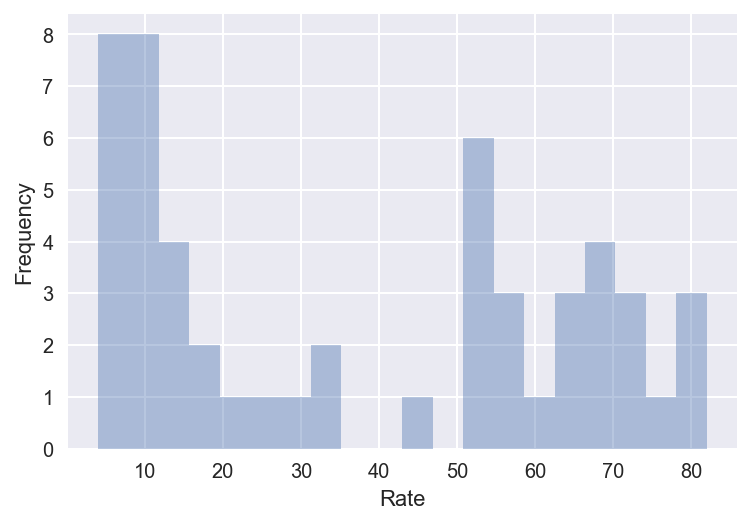

In [8]:
#Histogram of rate
sns.distplot(satDF['Rate'], bins=20, kde=False)
plt.xlabel('Rate')
plt.ylabel('Frequency')

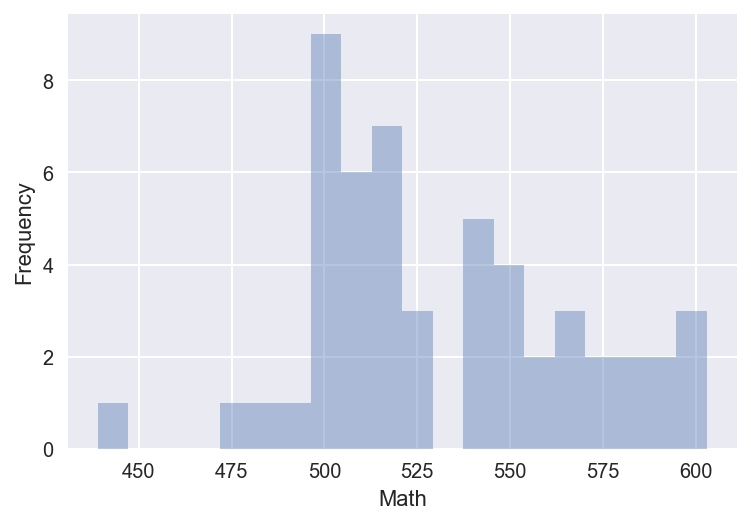

In [11]:
#Histogram of math scores
sns.distplot(satDF['Math'], bins=20, kde=False)
plt.xlabel('Math')
plt.ylabel('Frequency')

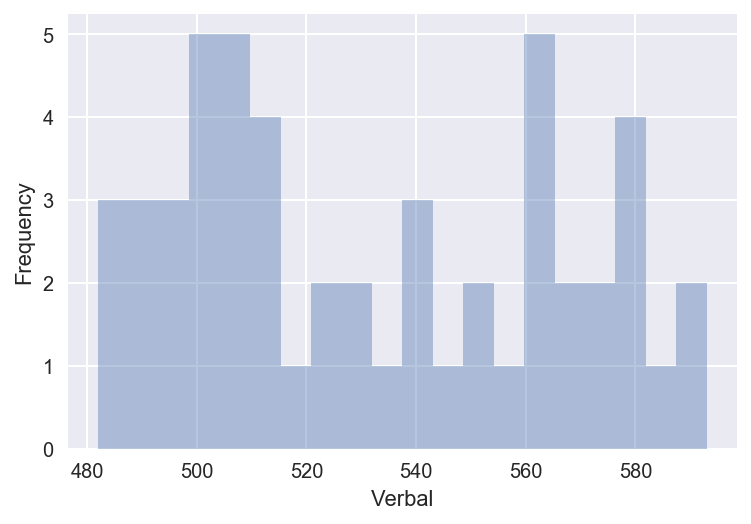

In [12]:
#Histogram of verbal scores
sns.distplot(satDF['Verbal'], bins=20, kde=False)
plt.xlabel('Verbal')
plt.ylabel('Frequency')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

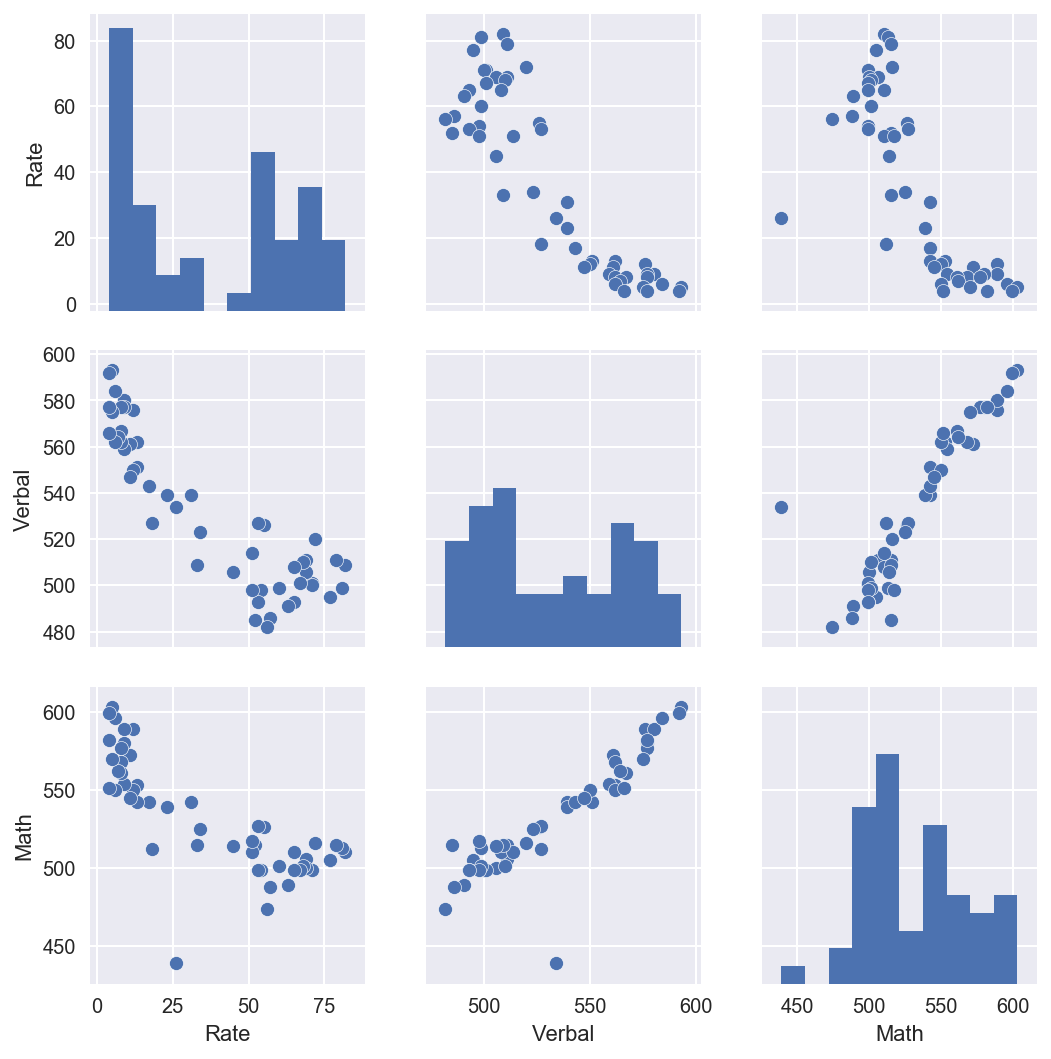

In [56]:
sns.pairplot(satDF)
#Visualations are showing clear trends for paired attributes. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

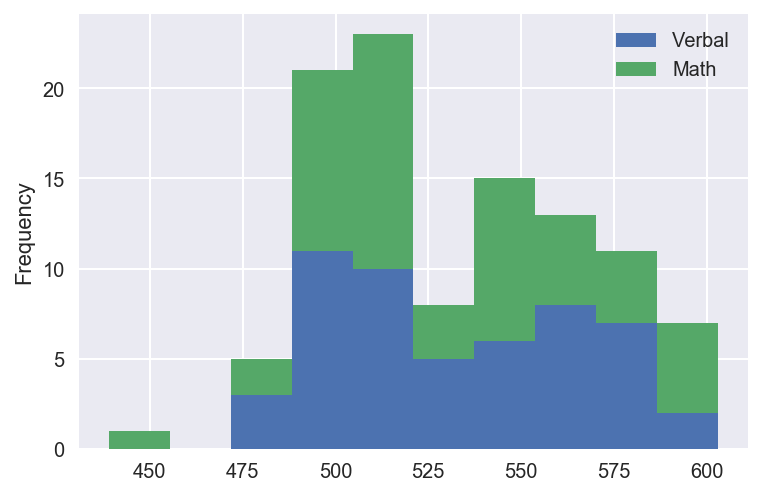

In [76]:
satDF[['Verbal', 'Math']].plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

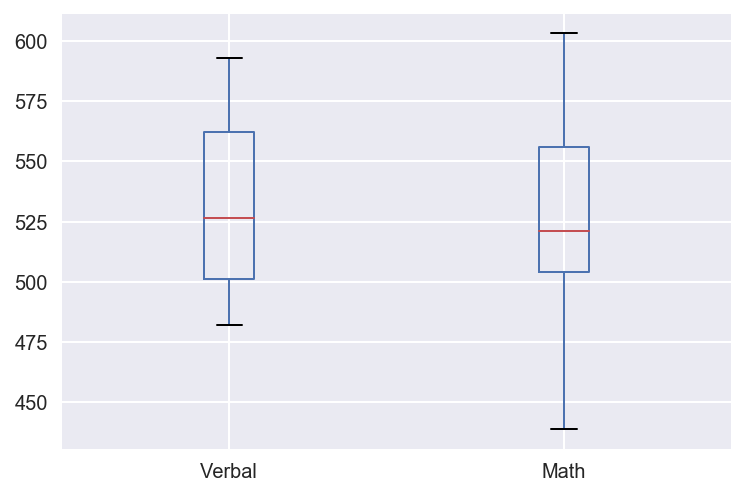

In [13]:
satDF.boxplot(column=['Verbal', 'Math'])

/Users/robshlee/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


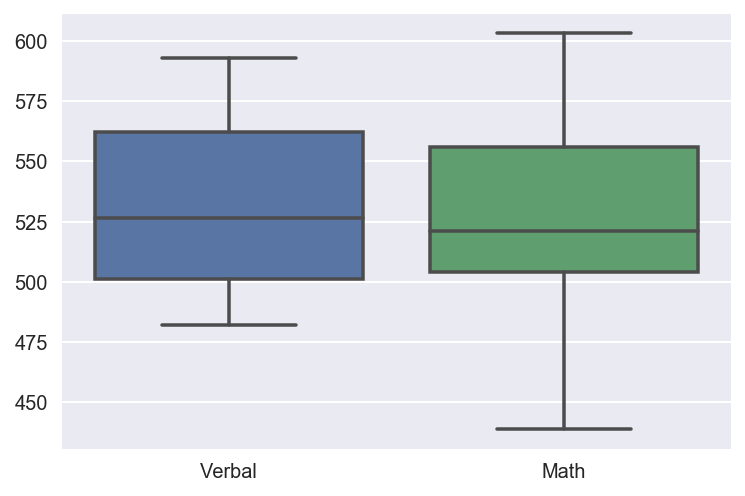

In [83]:
sns.boxplot(satDF[['Verbal', 'Math']])
#Boxplots make it easier to see the differences in variance and IQRs. 

/Users/robshlee/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


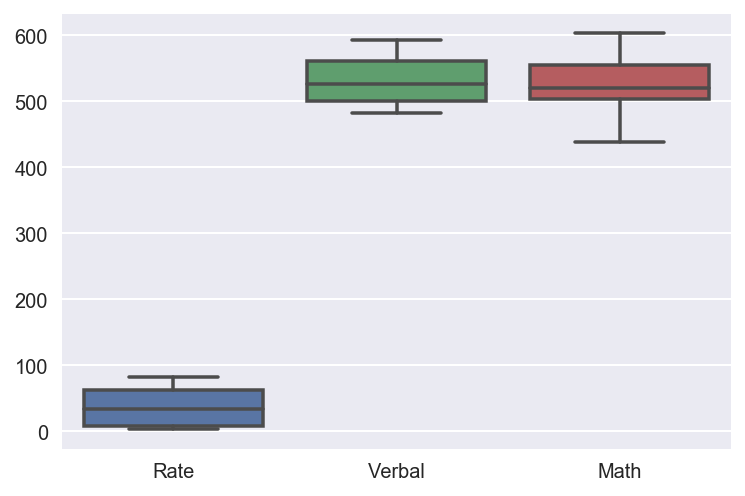

In [84]:
sns.boxplot(satDF)
#'Rate''s measure isn't the same as measure of 'Verbal' and 'Math' thus making the below 
#graph's y-axis arbritrary.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [228]:
newDF = satDF.copy()

In [238]:
#Create new columns for percentage from total
#In this case verbal and math were out of 600
newDF['Verbal_PercentFromTotal'] = (newDF['Verbal'] / 600) * 100
newDF['Math_PercentFromTotal'] = (newDF['Math'] / 600) * 100

/Users/robshlee/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


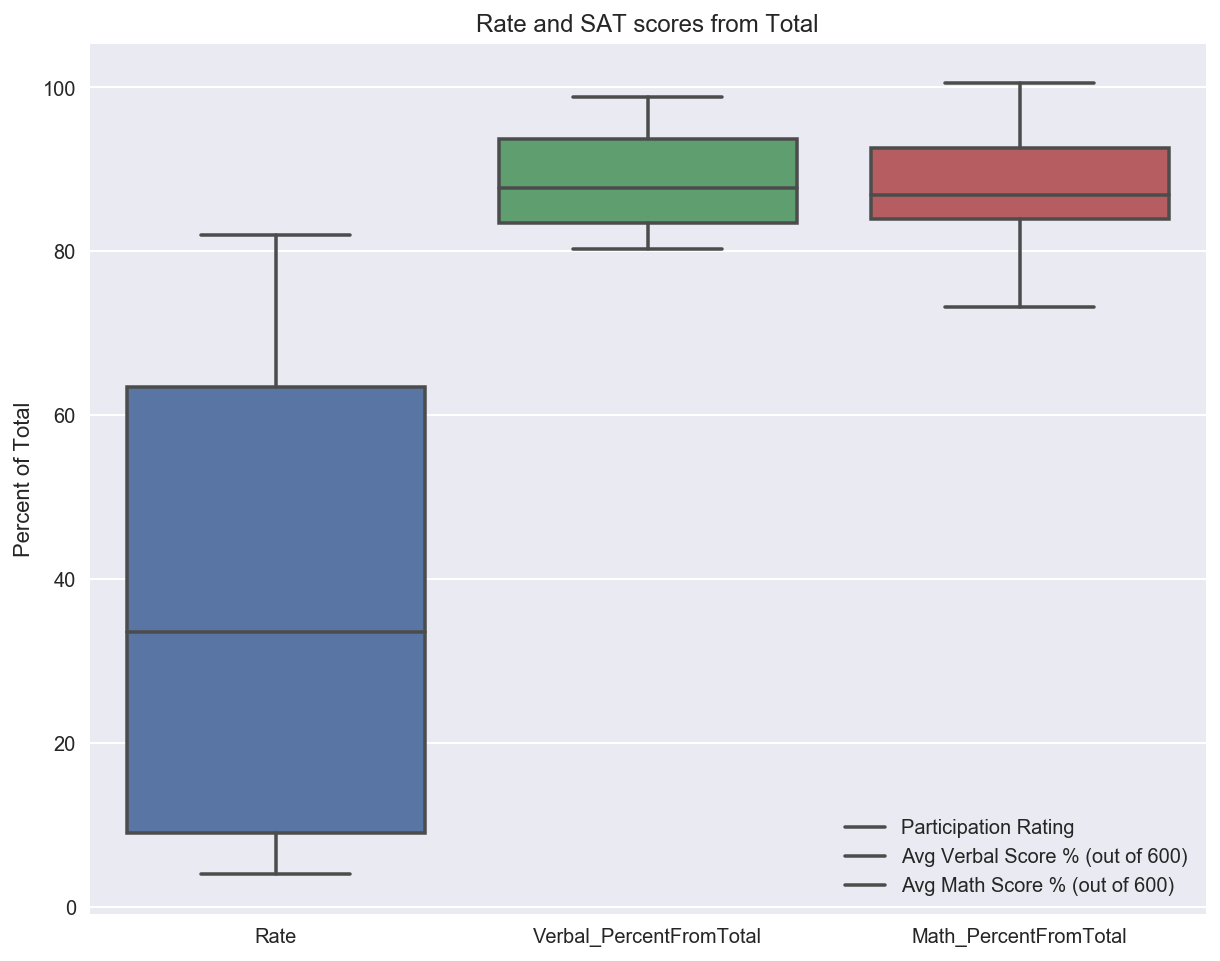

In [247]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.boxplot(newDF[['Rate', 'Verbal_PercentFromTotal', 'Math_PercentFromTotal']])
plt.ylabel('Percent of Total')
plt.title('Rate and SAT scores from Total')
plt.legend(('Participation Rating', 'Avg Verbal Score % (out of 600)', 'Avg Math Score % (out of 600)'), loc='lower right')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have an average `Verbal` score greater than the average of `Verbal` scores across the entire dataset

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [103]:
verbalMean = np.mean(satDF['Verbal'])

satDF[satDF['Verbal'] > verbalMean]['State']

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [104]:
satDF[satDF['Verbal'] > verbalMean]['State'].shape
#24 states are above the mean from the dataset. This is very close to half the number of states
#in the dataset, thus we can infer this attribute is normally distributed.

(24,)

### 5.2 Find the list of states that have a median `Verbal` score greater than the median of `Verbal` scores across the entire dataset

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [107]:
verbalMedian = np.median(satDF['Verbal'])

satDF[satDF['Verbal'] > verbalMedian]['State']

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

In [109]:
satDF[satDF['Verbal'] > verbalMedian]['State'].shape
#There's 2 more states included in this subset than the 'above the mean' subset. These numbers
#are very close, but the difference can be attributed to the distribution having a small
#positive skew.

(26,)

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [110]:
satDF['Diff'] = satDF['Verbal'] - satDF['Math']

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [130]:
#1. (Verbal - Math) DataFrame
verbalMath = satDF.sort_values('Diff', ascending=False).iloc[0:10,:]
verbalMath.head(3)

,State,Rate,Verbal,Math,Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [131]:
#2 (Math - Verbal) DataFrame
mathVerbal = satDF.sort_values('Diff').iloc[0:10,:]
mathVerbal.head(3)

,State,Rate,Verbal,Math,Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).


- Use seaborn's `.heatmap` method to add some color to the matrix
- Set `annot=True`


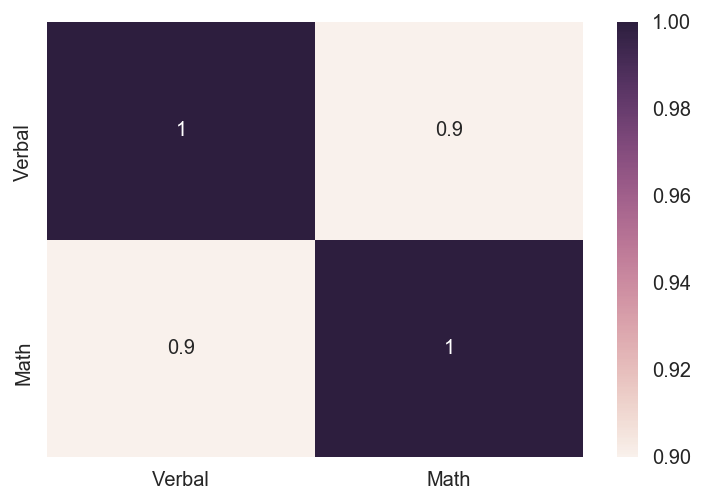

In [138]:
sns.heatmap(satDF[['Verbal', 'Math']].corr(), annot=True)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [140]:
satDF.describe()
#count: count of all non-null values in each column
#mean: mean of each column
#std: standard deviation of each column
#min: min of each column
#25%: (IQR) 25th percentile of each column
#50%: (IQR) 50th percentile of each column (median)
#75%: (IQR) 75th percentile of each column
#max: max of each column

,Rate,Verbal,Math,Diff
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

**1.** Although covariance and correlation try to measure the same thing, correlation is scaled between (-1) to (1). Without scaling, the matrix can be difficult to interpret as there's not a good benchmark.

**2.** Arithmetically it would be the covariance of 2 variables divided by the product of the sample means of each of the variables.
(covariance of A and B) / ( (sample mean A) * (sample mean B) )

**3.** Partly answered in (1.), because the covariance isn't scaled the number can be difficult to interpret. With the scaling in correlations, the number can be quickly assessed on what the relationship seems to be.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [15]:
#Create dataframe with csv
df = pd.read_csv('drug-use-by-age.csv')

In [16]:
df.head()
#noticed the '-' in some entries which look like missing values.

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [17]:
df.dtypes
#To see all columns that may contain '-' need to see all columns that are not floats or ints.

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [18]:
objList = ['age', 'heroin-frequency', 'cocaine-frequency', 'crack-frequency', 'inhalant-frequency', 'oxycontin-frequency', 'meth-frequency']

In [19]:
df[objList].applymap(lambda x: str.count(x, '-')).sum()
#Based on the type of analysis, these missing values will have to be considered. If we omit 
#these columns from the analysis it'll allow us to use all rows. Although the number of data
#points in this dataset is very small, we would have to omit a total of 4 rows to clean this
#dataset to use to full capacity. 

age                    6
heroin-frequency       1
cocaine-frequency      1
crack-frequency        3
inhalant-frequency     1
oxycontin-frequency    1
meth-frequency         2
dtype: int64

In [20]:
df[objList]
#row index 0, 1, 2, 16 have missing values.
#Because the missing values are only in very low age groups and the oldest, it's being assumed
#these are 0 values rather than missing.

,age,heroin-frequency,cocaine-frequency,crack-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,35.5,5.0,-,19.0,24.5,-
1,13,-,1.0,3.0,12.0,41.0,5.0
2,14,2.0,5.5,-,5.0,4.5,24.0
3,15,1.0,4.0,9.5,5.5,3.0,10.5
4,16,66.5,7.0,1.0,3.0,4.0,36.0
5,17,64.0,5.0,21.0,4.0,6.0,48.0
6,18,46.0,5.0,10.0,4.0,7.0,12.0
7,19,180.0,5.5,2.0,3.0,7.5,105.0
8,20,45.0,8.0,5.0,4.0,12.0,12.0
9,21,30.0,5.0,17.0,2.0,13.5,2.0


In [21]:
#Create 2nd dataframe with removed rows to be able to do column level analysis on all columns
df2 = df.copy()
df2 = df2.drop(df.index[0])
df2 = df2.drop(df.index[1])
df2 = df2.drop(df.index[2])
df2 = df2.drop(df.index[16])

In [22]:
#Create 3rd dataframe with 0 in place of '-'
df3 = df.copy()

In [23]:
df3 = df3.replace('-', 0)

In [24]:
#Change datatypes of all columnns (except 'age') to floats from objects
objList.remove('age')
df2[objList] = df2[objList].astype(float)

In [25]:
df2.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

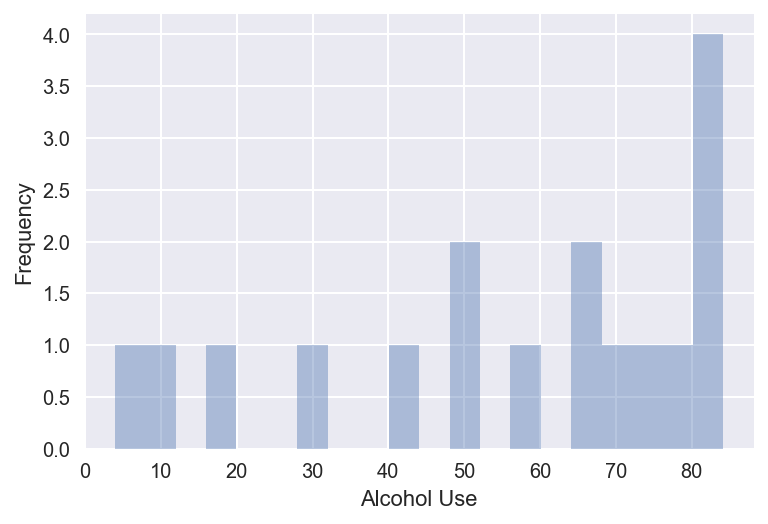

In [26]:
#Histogram of alcohol use
sns.distplot(df['alcohol-use'], bins=20, kde=False)
plt.xlabel('Alcohol Use')
plt.ylabel('Frequency')

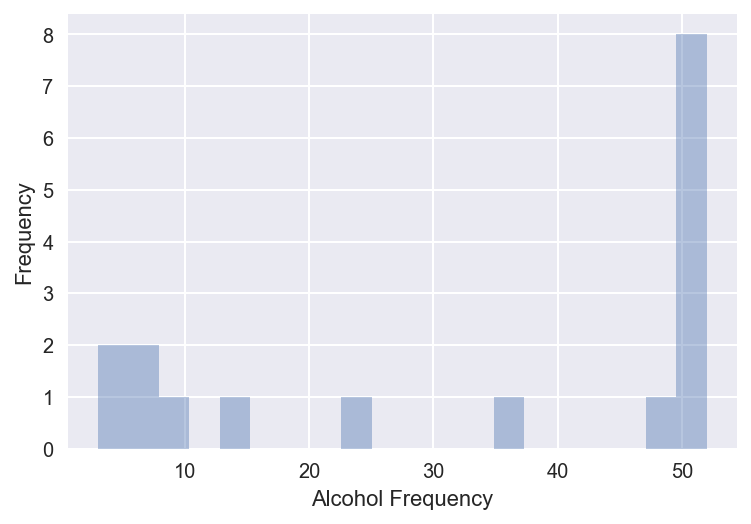

In [28]:
#Histogram of alcohol frequency
sns.distplot(df['alcohol-frequency'], bins=20, kde=False)
plt.xlabel('Alcohol Frequency')
plt.ylabel('Frequency')

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [42]:
useCols = []
freqCols = []
for i in df.columns:
    if 'use' in i:
        useCols.append(i)
    elif 'frequency' in i:
        freqCols.append(i)

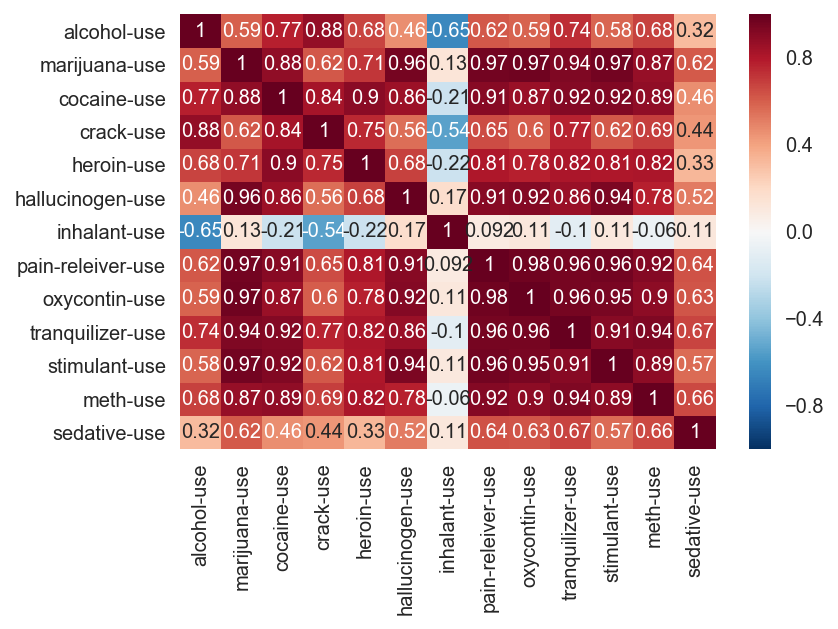

In [43]:
sns.heatmap(df[useCols].corr(), annot=True)
#High correlations with drug use with other drugs

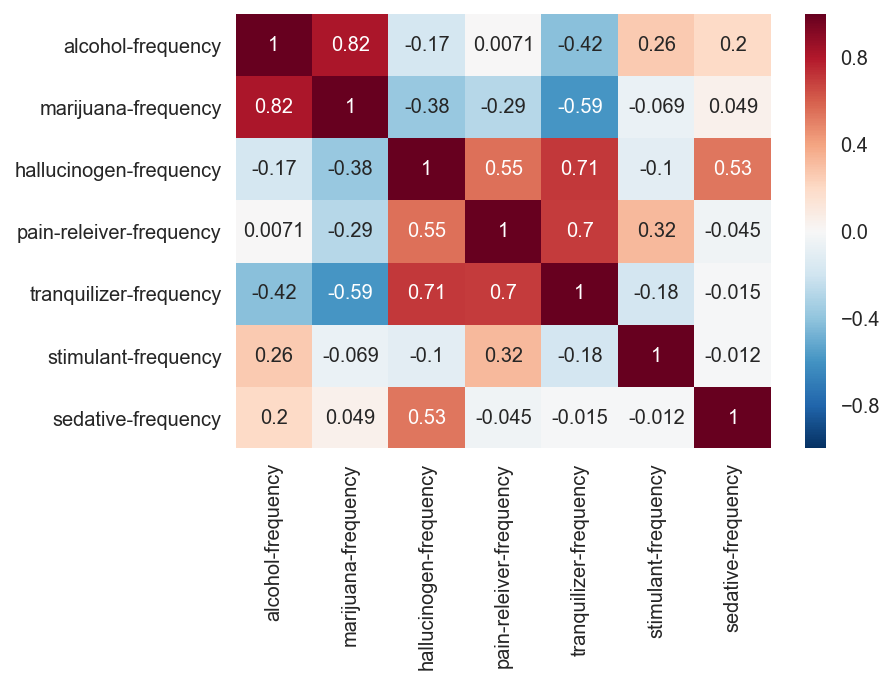

In [44]:
sns.heatmap(df[freqCols].corr(), annot=True)
#High correlations with drug frequency with other drugs, but not as much as the use

[]

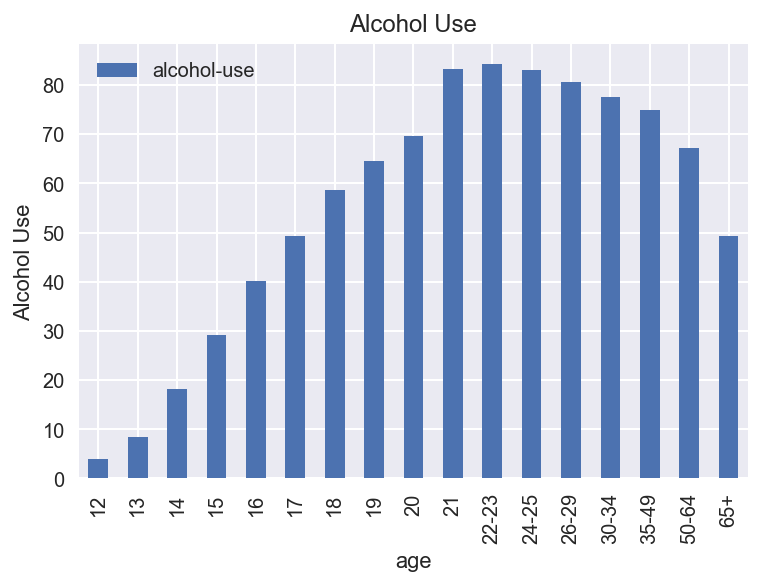

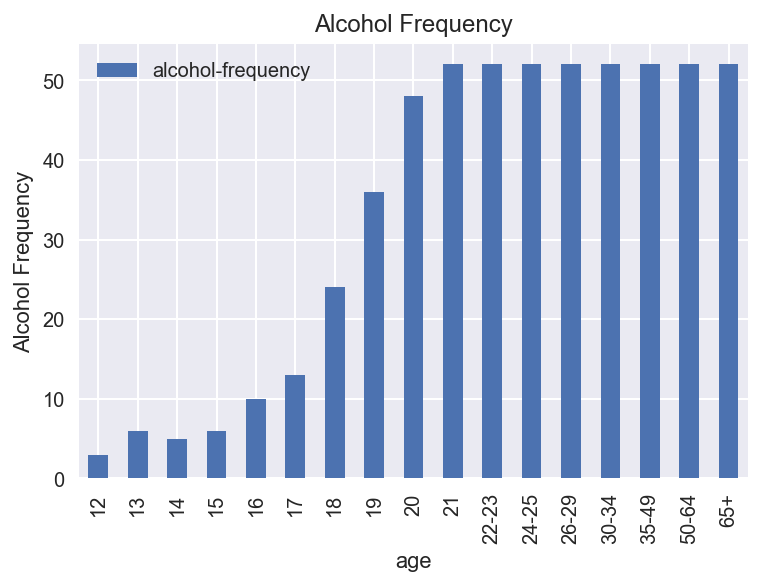

In [129]:
df.plot('age', 'alcohol-use', kind='bar')
plt.ylabel('Alcohol Use')
plt.title('Alcohol Use')
plt.plot()

df.plot('age', 'alcohol-frequency', kind='bar')
plt.ylabel('Alcohol Frequency')
plt.title('Alcohol Frequency')
plt.plot()
#Alcohol use ramps up quickly from age 12 to 22-23 then slowly decreases until age 65+.
#Alcohol frequency starts exponentially increasing from age 14 - age 20. It then plateaus
#until the last age group.

In [59]:
df[['age', 'alcohol-use']].iloc[[5, 16], :]
#Alcohol use is the same at age 17 as it is with age 65+.

,age,alcohol-use
5,17,49.3
16,65+,49.3


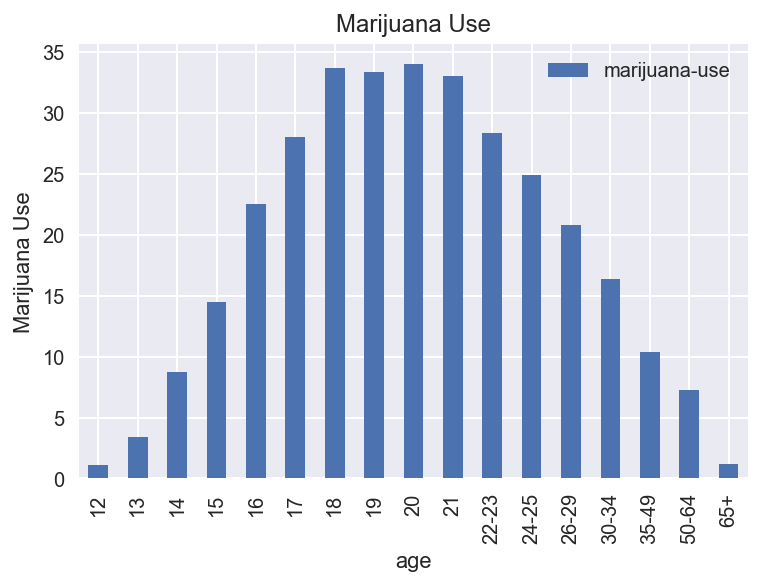

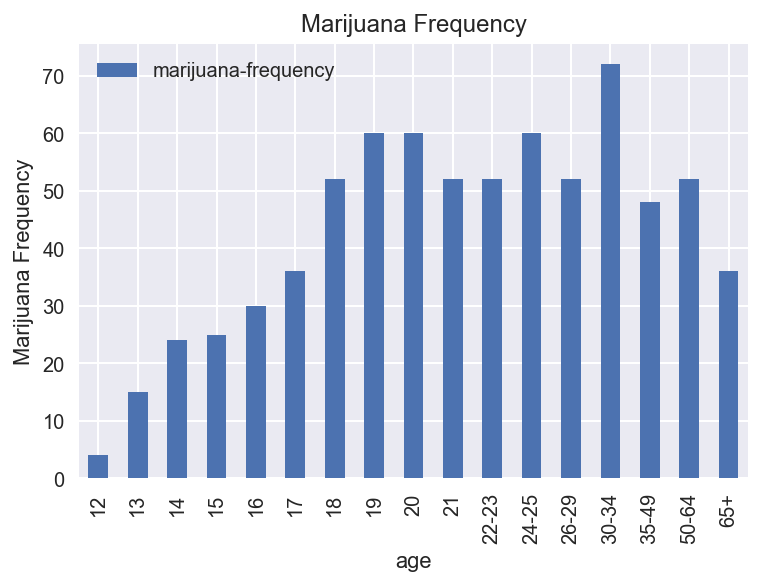

In [130]:
df.plot('age', 'marijuana-use', kind='bar')
plt.ylabel('Marijuana Use')
plt.title('Marijuana Use')
plt.plot()

df.plot('age', 'marijuana-frequency', kind='bar')
plt.ylabel('Marijuana Frequency')
plt.title('Marijuana Frequency')
#Marijuana use peaks between ages 18-21 then decreases per age group after.
#There's an apparent spike in marijuana frequency for age group 30-34.

In [122]:
#Alcohol use was highest use for every age group.
df3.set_index('age', inplace=True)
df3[useCols].idxmax(axis=1).to_frame()

,0
age,
12,alcohol-use
13,alcohol-use
14,alcohol-use
15,alcohol-use
16,alcohol-use
17,alcohol-use
18,alcohol-use
19,alcohol-use
20,alcohol-use


In [123]:
#2nd highest use drug for most age groups was marijuana.
df3[useCols].drop('alcohol-use', axis=1).idxmax(axis=1).to_frame()

,0
age,
12,pain-releiver-use
13,marijuana-use
14,marijuana-use
15,marijuana-use
16,marijuana-use
17,marijuana-use
18,marijuana-use
19,marijuana-use
20,marijuana-use


In [124]:
#3rd highest use drug for most age groups was pain reliever.
df3[useCols].drop(['alcohol-use', 'marijuana-use'], axis=1).idxmax(axis=1).to_frame()

,0
age,
12,pain-releiver-use
13,inhalant-use
14,pain-releiver-use
15,pain-releiver-use
16,pain-releiver-use
17,pain-releiver-use
18,pain-releiver-use
19,pain-releiver-use
20,pain-releiver-use


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


### 1. The marijuana frequency for age group 30-34 is significantly different from adjacent age groups.
### 2. Deliverable will be a depiction and enough 'reasoning' to show the marijuana frequency for age group 30-34 is different from adjacent age groups.

### 3.

,marijuana-frequency
age,
12,4.0
13,15.0
14,24.0
15,25.0
16,30.0
17,36.0
18,52.0
19,60.0
20,60.0


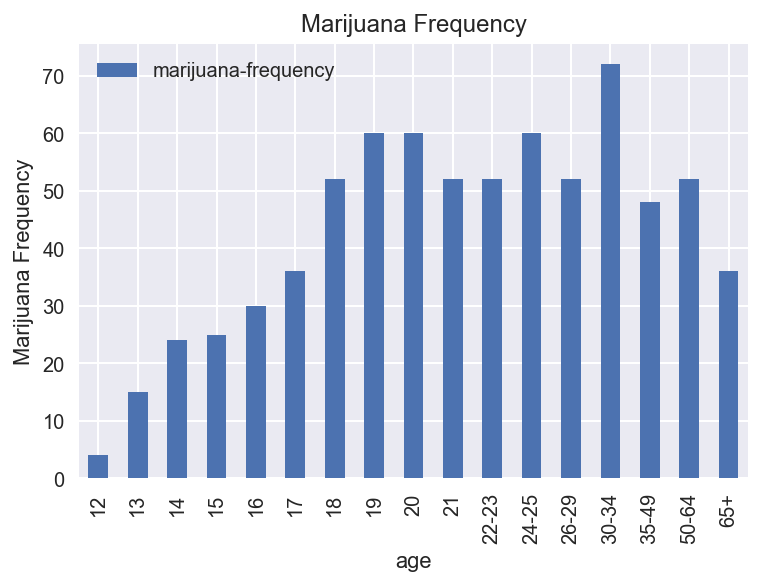

In [147]:
#Display all age groups and their marijuana frequency
df.plot('age', 'marijuana-frequency', kind='bar')
plt.ylabel('Marijuana Frequency')
plt.title('Marijuana Frequency')
plt.plot()

df3.loc[:, 'marijuana-frequency'].to_frame()

       marijuana-frequency
age                       
26-29                 52.0
30-34                 72.0
35-49                 48.0


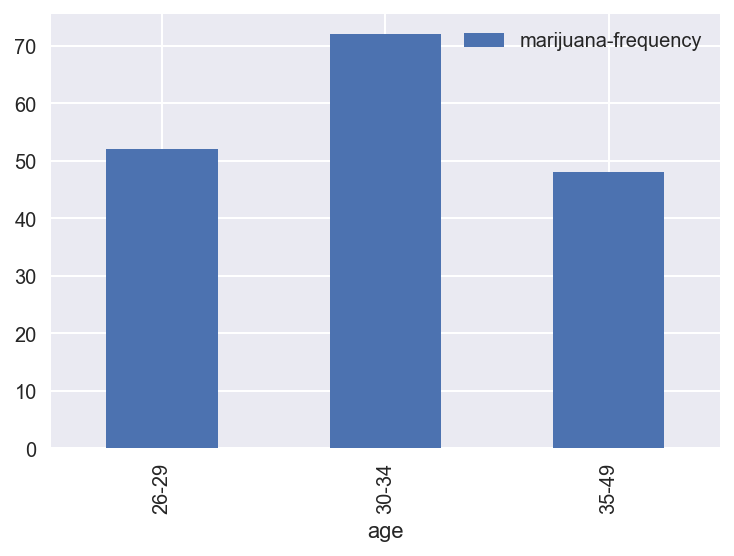

In [157]:
#Age group 30-34 and adjacent age groups.
print(df3.loc[['26-29', '30-34', '35-49'], 'marijuana-frequency'].to_frame())

df3.loc[['26-29', '30-34', '35-49'], 'marijuana-frequency'].to_frame().reset_index().plot('age', 'marijuana-frequency', kind='bar')

In [165]:
#'adj' variables are the marijuana frequency for the 2 adjacent age groups. 'subj' is the 
#marijuana frequency for age group 30-34
adj1 = df3.loc[['26-29', '30-34', '35-49'], 'marijuana-frequency'][0]
adj2 = df3.loc[['26-29', '30-34', '35-49'], 'marijuana-frequency'][2]
subj = df3.loc[['26-29', '30-34', '35-49'], 'marijuana-frequency'][1]

In [184]:
#Percent diff from age group 26-29 to age group 30-34
pChange1 = (((subj - adj1) / adj1) * 100).round(2)

#Percent diff from age group 26-29 to age group 30-34
pChange2 = (((subj - adj2) / adj2) * 100).round(2)

print('Percent diff from age group 26-29 to age group 30-34: {} %'.format(pChange1))
print('Percent diff from age group 35-49 to age group 30-34: {} %'.format(pChange2))

Percent diff from age group 26-29 to age group 30-34: 38.46 %
Percent diff from age group 35-49 to age group 30-34: 50.0 %


**4. Report**

The adjacent age groups of age group 30-34 have the following percent difference,
20-29- 38.46%
35-49- 50%

This gives us enough reason to believe age group 30-34 has significantly different marijuana frequency than the adjacent age groups.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the SAT dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [258]:
#1. 
rateDF = satDF[['Rate']]
rateDF.head()

,Rate
0,82
1,81
2,79
3,77
4,72


In [265]:
#2, 3.
confInt = np.percentile(rateDF, [2.5, 97.5])

rateDF[rateDF['Rate'] < confInt[0]]
rateDF[rateDF['Rate'] > confInt[1]]

#Defining outliers in this dataset by anything outside 2.5th and 97.5th percentiles.
#There are 2 outliers that are above the 97.5th percentile threshold.

,Rate
0,82
1,81


In [281]:
#4. 
cleanRateDF = rateDF[rateDF['Rate'] <= confInt[1]]
cleanRateDF.head()

,Rate
2,79
3,77
4,72
5,71
6,71


In [291]:
ateDF.describe()

,Rate
count,52.000000
mean,37.153846
std,27.301788
min,4.000000
25%,9.000000
50%,33.500000
75%,63.500000
max,82.000000


In [293]:
#5. The cleaned datset has a lower mean and median which is expected because we deleted
# outliers above the 97.5th percntile. The standard deviation is lower in the clean dataset
# because by deleting outliers, we are reducing the spread or variance of the dataset.
concatDF = pd.concat([cleanRateDF.describe(), rateDF.describe()], axis=1)
concatDF.columns = ['clean', 'original']
concatDF

,clean,original
count,50.000000,52.000000
mean,35.380000,37.153846
std,26.312013,27.301788
min,4.000000,4.000000
25%,9.000000,9.000000
50%,32.000000,33.500000
75%,59.250000,63.500000
max,79.000000,82.000000
